<a href="https://colab.research.google.com/github/janedewes/Py-MachineLearning/blob/master/DesenvolverDiabetesML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 O conjunto de dados usado para fazer a análise consiste em uma pesquisa realizada com um grupo de mulheres. 
Nessa pesquisa, foram coletados alguns indicadores sobre a saúde e os hábitos dessas 
pacientes, como número de vezes em que engravidou, seu nível de glicose, sua pressão 
sanguínea, etc., a fim de prever se a ela vai ou não desenvolver a diabetes. 
Na última coluna do conjunto de dados (outcome), o valor “1” indica que a paciente possui diabetes, 
e “0” indica que não. Desse modo, será possível utilizar os algoritmos apresentados e o 
scikit-learn para tentar prever a ocorrência ou não da doença.

Dataset disponível no Kaggle. 


In [ ]:
# Algoritmos usados: 
# KNN
# Árvore de Decisão
# Floresta Randômica 
# SVM 
# Rede MLP

In [ ]:
#importar as bibliotecas necessárias
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mat



In [ ]:
# Importar pandas
import pandas as pd

In [ ]:
# Carregar arquivos no colab
from google.colab import files
uploaded = files.upload()

Saving datasets_diabetes.csv to datasets_diabetes (1).csv


In [ ]:
# Realizar a carga dos dados 
df = pd.read_csv('datasets_diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# visualizando as primeiras linhas do df
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# verificando se existem valores nulos
df.isnull().values.any()

False

In [ ]:
# verificando a quantidade de resgistros nulos
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Número de registro igual a 0 em cada coluna:
(df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI']] == 0).sum()

Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [ ]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(df, size=10):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns) 

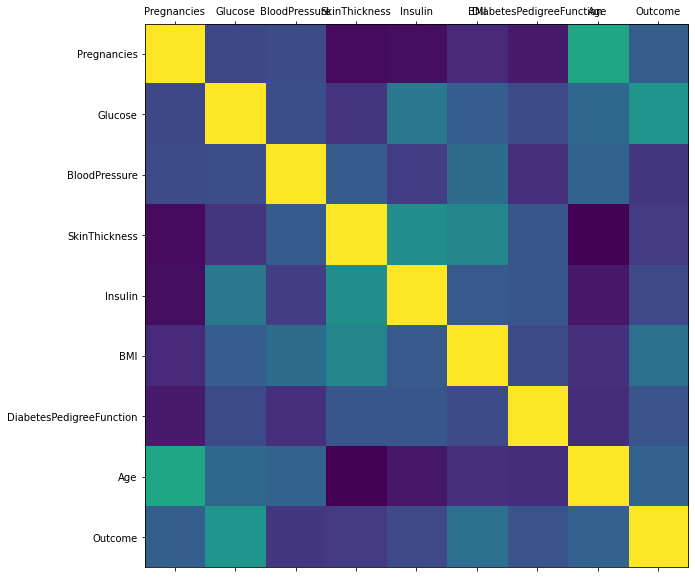

In [ ]:
# criar grafico de correlação
plot_corr(df)

In [ ]:
# Visualizando a correlação em tabela
# Coeficiente de correlação: 
# +1  = forte correlação positiva
# 0   = não há correlação
# -1  = forte correlação negativa
df.corr()

# analise:
# OBS: Saber quais as variaveis mais relevantes p construir o modelo preditivo 
#  o que interessa é saber a relação de cada variavel com as outras.

# abaixo a tabela é igual ao grafico, porem com as correlações ja calculadas

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
# Definindo as classes
diabetes_map = {True : 1, False : 0}

In [ ]:
# Aplicando o mapeamento ao dataset
df['Outcome'] = df['Outcome'].map(diabetes_map)

In [ ]:
# verificando as primeiras linhas do df
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
# Verificando como os dados estão distribuídos
num_true = len(df.loc[df['Outcome'] == True])
num_false = len(df.loc[df['Outcome'] == False])
print("Número de Casos Verdadeiros: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Número de Casos Falsos     : {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

Número de Casos Verdadeiros: 268 (34.90%)
Número de Casos Falsos     : 500 (65.10%)


In [ ]:
# ou 
df.groupby('Outcome').count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [ ]:
# ou
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Algoritmo KNN

In [ ]:
# Transf dados em array
entradas = df.iloc[:,:-1].values
saida = df.iloc[:, 8].values

In [ ]:
# X = entradas
# y = saida

In [ ]:
# Divisão dos dados entre treinamento e teste 
from sklearn.model_selection import train_test_split
entradas_train, entradas_test, saida_train, saida_test = train_test_split(entradas, saida, test_size=0.30, random_state=42)

X_train = entradas_train

X_test = entradas_test

y_train = saida_train

y_test = saida_test

y_pred = saida_pred

In [ ]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(entradas_train)/len(df.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(entradas_test)/len(df.index)) * 100))

69.92% nos dados de treino
30.08% nos dados de teste


Verificando o Split

In [ ]:

print("Original True : {0} ({1:0.2f}%)".format(len(df.loc[df['Outcome'] == 1]), 
                                               (len(df.loc[df['Outcome'] ==1])/len(df.index) * 100)))

print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['Outcome'] == 0]), 
                                               (len(df.loc[df['Outcome'] == 0])/len(df.index) * 100)))
print("")
print("Training True : {0} ({1:0.2f}%)".format(len(saida_train[saida_train[:] == 1]), 
                                               (len(saida_train[saida_train[:] == 1])/len(saida_train) * 100)))

print("Training False : {0} ({1:0.2f}%)".format(len(saida_train[saida_train[:] == 0]), 
                                               (len(saida_train[saida_train[:] == 0])/len(saida_train) * 100)))
print("")
print("Test True : {0} ({1:0.2f}%)".format(len(saida_test[saida_test[:] == 1]), 
                                               (len(saida_test[saida_test[:] == 1])/len(saida_test) * 100)))

print("Test False : {0} ({1:0.2f}%)".format(len(saida_test[saida_test[:] == 0]), 
                                               (len(saida_test[saida_test[:] == 0])/len(saida_test) * 100)))

Original True : 268 (34.90%)
Original False : 500 (65.10%)

Training True : 188 (35.01%)
Training False : 349 (64.99%)

Test True : 80 (34.63%)
Test False : 151 (65.37%)


Valores Missing Ocultos

In [ ]:
# Verificando se existem valores nulos
df.isnull().values.any()

False

In [ ]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Verificando valores Missing
print("# Linhas no dataframe {0}".format(len(df)))
print("# Linhas missing glucose_conc: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("# Linhas missing diastolic_bp: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("# Linhas missing thickness: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("# Linhas missing insulin: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("# Linhas missing bmi: {0}".format(len(df.loc[df['BMI'] == 0])))
print("# Linhas missing age: {0}".format(len(df.loc[df['Age'] == 0])))

# Linhas no dataframe 768
# Linhas missing glucose_conc: 5
# Linhas missing diastolic_bp: 35
# Linhas missing thickness: 227
# Linhas missing insulin: 374
# Linhas missing bmi: 11
# Linhas missing age: 0


Tratando Dados Missing - Input

Substituindo os valores iguais a zero, pela média dos dados

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
# Criando objeto
preenche_0 = SimpleImputer(missing_values = 0, strategy = "mean")

# Substituindo os valores iguais a zero, pela média dos dados
entradas_train = preenche_0.fit_transform(entradas_train)
entradas_test = preenche_0.fit_transform(entradas_test)

In [ ]:
entradas_train

array([[  1.        ,  95.        ,  60.        , ...,  23.9       ,
          0.26      ,  22.        ],
       [  5.        , 105.        ,  72.        , ...,  36.9       ,
          0.159     ,  28.        ],
       [  4.34056399, 135.        ,  68.        , ...,  42.3       ,
          0.365     ,  24.        ],
       ...,
       [ 10.        , 101.        ,  86.        , ...,  45.6       ,
          1.136     ,  38.        ],
       [  4.34056399, 141.        ,  72.24131274, ...,  42.4       ,
          0.205     ,  29.        ],
       [  4.34056399, 125.        ,  96.        , ...,  22.5       ,
          0.262     ,  21.        ]])

Construindo e treinando o modelo

In [ ]:
# Normalização dos dados
from sklearn.preprocessing import MinMaxScaler
normaliza = MinMaxScaler()
entradas_normalizadas=normaliza.fit_transform(entradas)

In [ ]:
#treina o modelo (USANDO KNN (KNeighborsClassifier))
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5) #utiliza a construção por meio de 5 vizinhos
classifier.fit(entradas_train, saida_train) # aplica a classificação

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#realiza a previsão (testar com 30% dos dados )(avaliar se o modelo está classificando bem ou não)
saida_pred = classifier.predict(entradas_test)

In [ ]:
#constroir a matriz de confusão para comparar o modelo criado (classificar os diferentes tipos de plantas)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(saida_test, saida_pred))
print(classification_report(saida_test, saida_pred))

#acuracia = 68% dos casos classificar corretamente com a previsão

[[110  41]
 [ 33  47]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       151
           1       0.53      0.59      0.56        80

    accuracy                           0.68       231
   macro avg       0.65      0.66      0.65       231
weighted avg       0.69      0.68      0.68       231



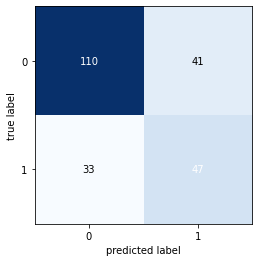

In [ ]:
#realiza o plot da matriz de confusão (ver a classificação das instancias)
matriz_confusao = confusion_matrix(saida_test, saida_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

Fim da análise com KNN

Algoritmo Árvore de Decisão

In [ ]:
# importando a biblioteca
from sklearn.tree import DecisionTreeClassifier # importa o classificador árvore de decisão (dentro da biblioteca do scikitlearn) (CLASSIFICAÇÃO = DecisionTreeClassifier)
from sklearn import metrics #importa as métricas para avaliação

In [ ]:
# Cria o objeto de classificação através do 
clf = DecisionTreeClassifier(random_state=1)

# Realiza o treinamento do classificador (DADOS DE X E Y  usados anteriormente)
clf = clf.fit(entradas_train,saida_train)

#Realiza a previsão de classificaçao  (dados de entrada e saida ja foram definidos acima)
saida_pred = clf.predict(entradas_test)

In [ ]:
#constroir a matriz de confusão para comparar o modelo criado (classificar os diferentes tipos de plantas)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(saida_test, saida_pred))
print(classification_report(saida_test, saida_pred))

#acuracia = 73% dos casos classificar corretamente com a previsão

[[118  33]
 [ 29  51]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       151
           1       0.61      0.64      0.62        80

    accuracy                           0.73       231
   macro avg       0.70      0.71      0.71       231
weighted avg       0.73      0.73      0.73       231



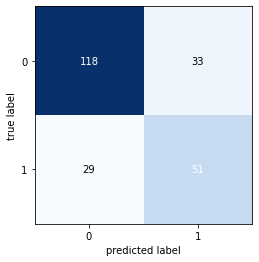

In [ ]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(saida_test, saida_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

Fim do algoritmo Arvore de decisão

Algoritmo Floresta de Randômica

In [ ]:
# importar biblioteca
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# criar objeto Random Forest
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)

In [ ]:
# Treinar o modelo 
clf_floresta.fit(entradas_train, saida_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
# previsão 
saida_pred = clf_floresta.predict(entradas_test)

In [ ]:
#constroir a matriz de confusão para comparar o modelo criado (classificar os diferentes tipos de plantas)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(saida_test, saida_pred))
print(classification_report(saida_test, saida_pred))

#acuracia = 75% dos casos classificar corretamente com a previsão

[[120  31]
 [ 27  53]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       151
           1       0.63      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.72      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



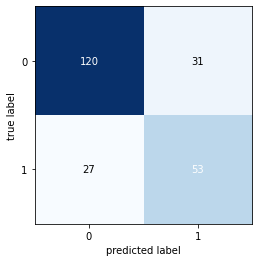

In [ ]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(saida_test, saida_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

Fim algoritmo Random Forest

Algoritmo SVM 

In [ ]:
#biblioteca necessária para a construção do SVM 
from sklearn.svm import SVC

In [ ]:
#cria o objeto SVM
clf = SVC(gamma='auto', random_state=1)  

In [ ]:
#realiza a classificação via SVM (treinar)
clf.fit(entradas_train,saida_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
#Realiza a previsão de classificaçao (a partir dos dados de teste de entrada, encontramos a saída)
saida_pred = clf.predict(entradas_test)

In [ ]:
#constroir a matriz de confusão para comparar o modelo criado (classificar os diferentes tipos de plantas)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(saida_test, saida_pred))
print(classification_report(saida_test, saida_pred))

#acuracia = 65% dos casos classificar corretamente com a previsão

[[151   0]
 [ 80   0]]
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       151
           1       0.00      0.00      0.00        80

    accuracy                           0.65       231
   macro avg       0.33      0.50      0.40       231
weighted avg       0.43      0.65      0.52       231



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


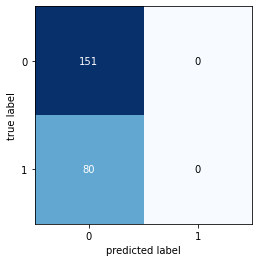

In [ ]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(saida_test, saida_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

Fim do algoritmo SVM

Algoritmo Rede MLP

In [ ]:
#definição da biblioteca (modelo MLP-Perceptron multicamada) (para fazer a CLASSIFICAÇÃO)
from sklearn.neural_network import MLPClassifier

In [ ]:
#define a configuração da rede
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1) #rede com escondidas com 5 neurônios cada 
#(RANDOM_STATE=1 para usar os mesmos dados de entrada e ter resultados de saídas semelhantes)

In [ ]:
#realiza o fit do modelo
clf.fit(entradas_train,saida_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
#realiza a previsão
saida_pred=clf.predict(entradas_test)

In [ ]:
#constroir a matriz de confusão para comparar o modelo criado (classificar os diferentes tipos de plantas)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(saida_test, saida_pred))
print(classification_report(saida_test, saida_pred))

#acuracia = 45% dos casos classificar corretamente com a previsão

[[68 83]
 [44 36]]
              precision    recall  f1-score   support

           0       0.61      0.45      0.52       151
           1       0.30      0.45      0.36        80

    accuracy                           0.45       231
   macro avg       0.45      0.45      0.44       231
weighted avg       0.50      0.45      0.46       231



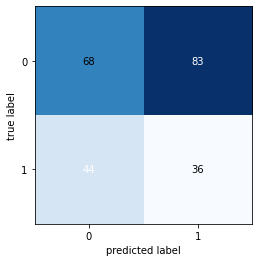

In [ ]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(saida_test, saida_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

fim do Algoritmo Rede MLP